# ARIMA model

The general process for ARIMA models is the following:

- Visualize the Time Series Data
- Make the time series data stationary
- Plot the Correlation and AutoCorrelation Charts
- Construct the ARIMA Model
- Use the model to make predictions
  

## Step 1

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [3]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df.columns = ['Month','Milk in Pounds per Cow']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   169 non-null    object 
 1   Milk in Pounds per Cow  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [6]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [7]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [8]:
df.drop(168,axis=0,inplace=True)

In [9]:
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [10]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [11]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


## Step 2

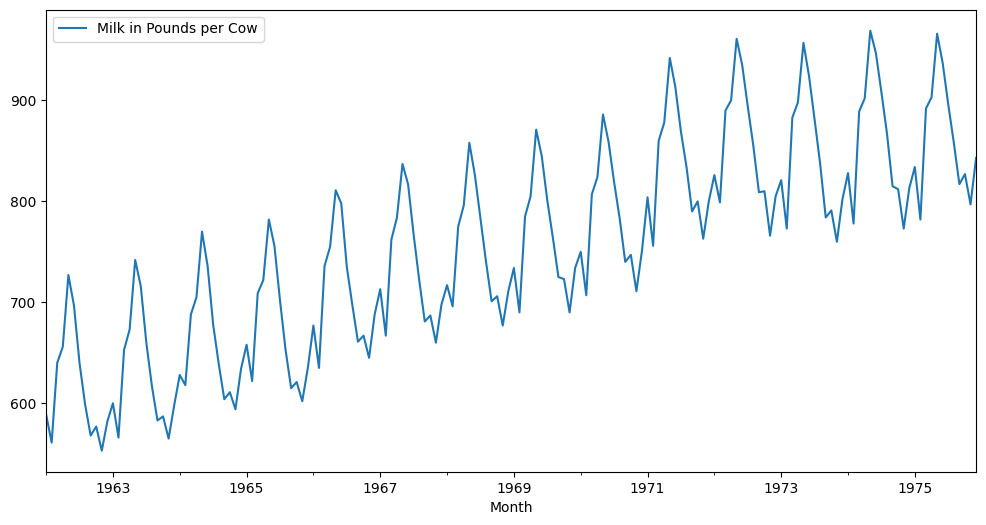

In [13]:
df.plot(figsize=(12,6));

In [14]:
time_series = df['Milk in Pounds per Cow']

In [15]:
type(time_series)

pandas.core.series.Series

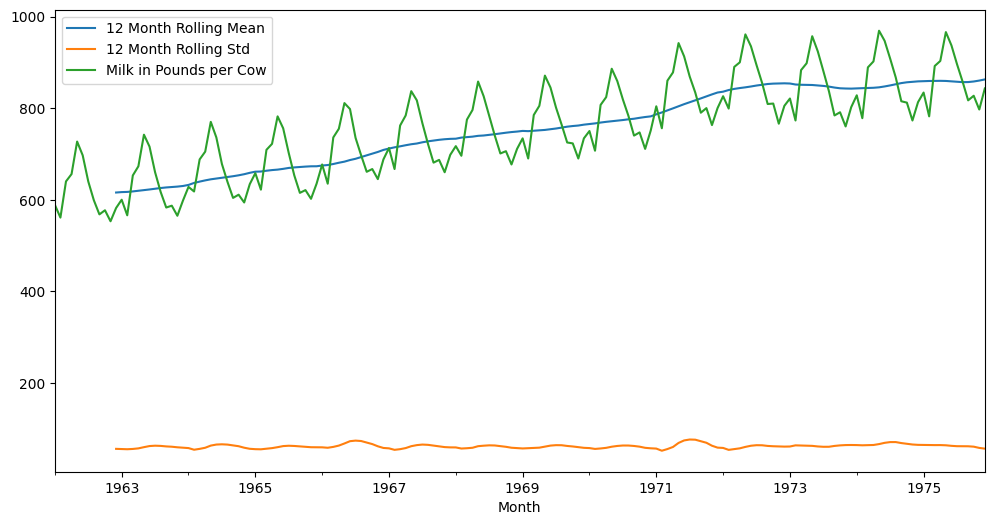

In [16]:
time_series.rolling(12).mean().plot(label= '12 Month Rolling Mean',figsize=(12,6))
time_series.rolling(12).std().plot(label= '12 Month Rolling Std',figsize=(12,6))
time_series.plot()

plt.legend();

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
decomp = seasonal_decompose(time_series,period=12)

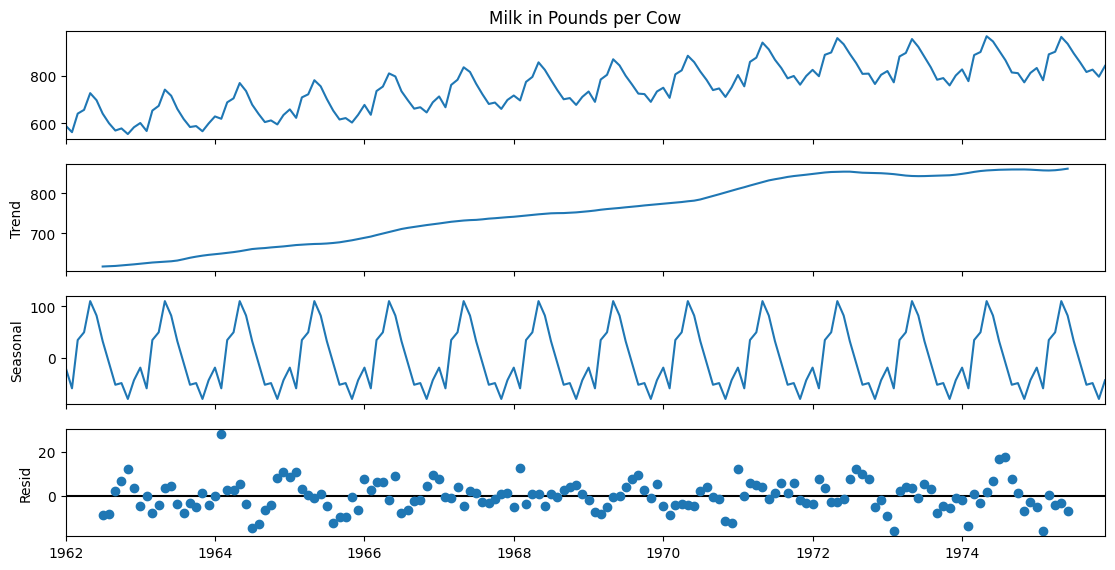

In [19]:
fig = decomp.plot()
fig.set_size_inches(12,6)

In [20]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [21]:
# Augmented Dickey-Fuller (ADF) Test
from statsmodels.tsa.stattools import adfuller

In [22]:
result = adfuller(df['Milk in Pounds per Cow'])

In [23]:
result

(np.float64(-1.3038115874221208),
 np.float64(0.6274267086030356),
 13,
 154,
 {'1%': np.float64(-3.473542528196209),
  '5%': np.float64(-2.880497674144038),
  '10%': np.float64(-2.576878053634677)},
 np.float64(1115.1730447395112))

In [24]:
def adf_check(time_series):
    
    result = adfuller(time_series)
    print("Augmented Dickey-Fuller Test")
    labels = ['ADF Test Statistic','p-value','# of lags','Num of Observations used']

    for value,label in zip(result,labels):
        print(label + " : " + str(value))

    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root, it is non-stationary")

In [25]:
adf_check(df['Milk in Pounds per Cow'])

Augmented Dickey-Fuller Test
ADF Test Statistic : -1.3038115874221208
p-value : 0.6274267086030356
# of lags : 13
Num of Observations used : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [26]:
df['First Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1)

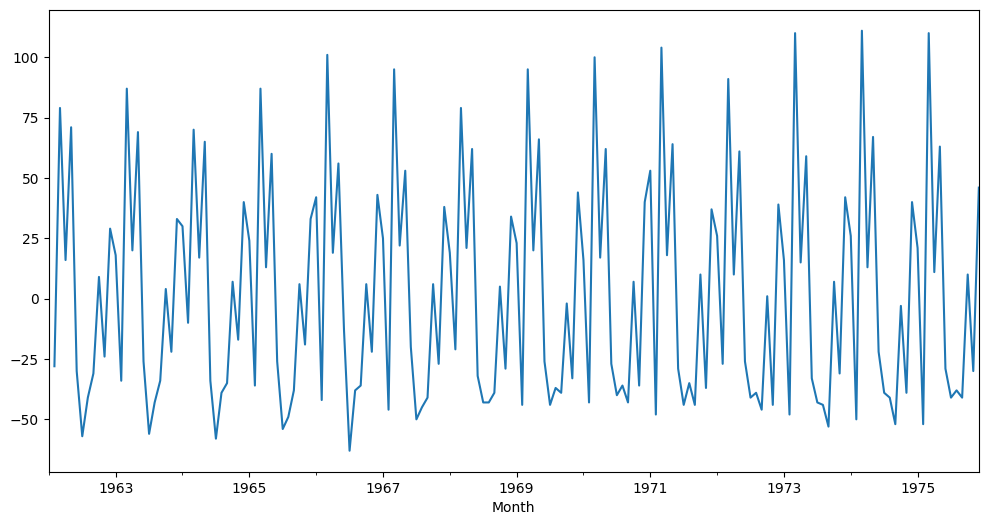

In [27]:
df['First Difference'].plot(figsize=(12,6));

In [28]:
adf_check(df['First Difference'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistic : -3.0549955586530846
p-value : 0.030068004001784457
# of lags : 14
Num of Observations used : 152
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [29]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

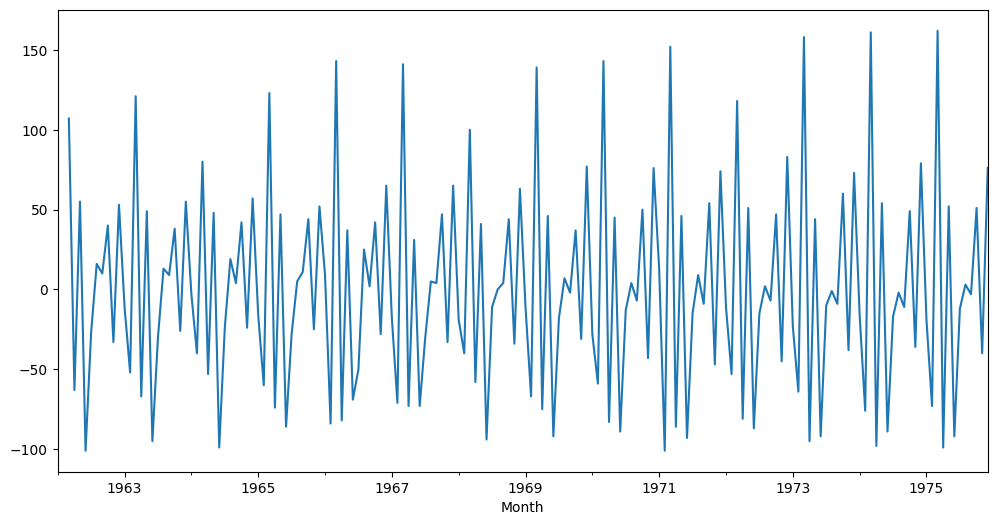

In [30]:
df['Second Difference'].plot(figsize=(12,6));

In [31]:
adf_check(df['Second Difference'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistic : -14.327873645603376
p-value : 1.112698933208163e-26
# of lags : 11
Num of Observations used : 154
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [32]:
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12)

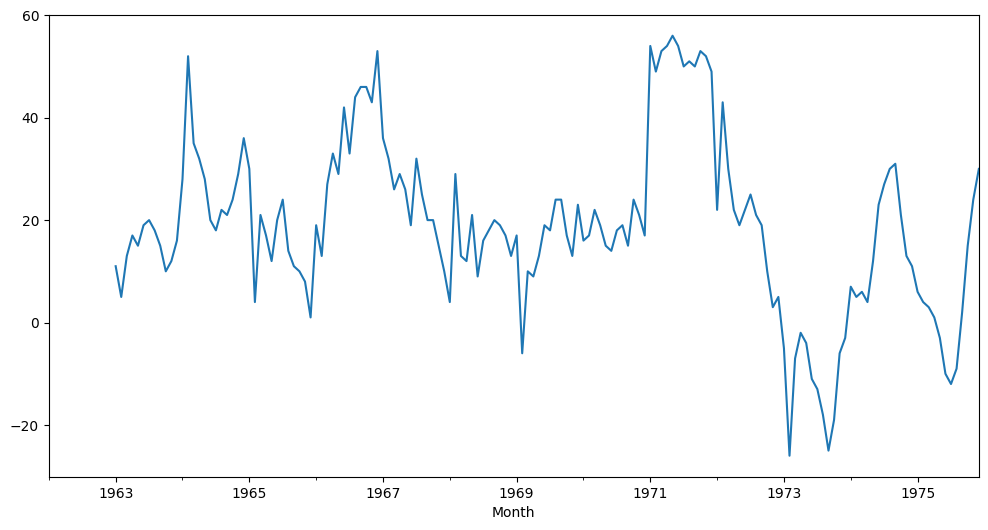

In [33]:
df['Seasonal Difference'].plot(figsize=(12,6));

In [34]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistic : -2.3354193143593975
p-value : 0.16079880527711365
# of lags : 12
Num of Observations used : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [35]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

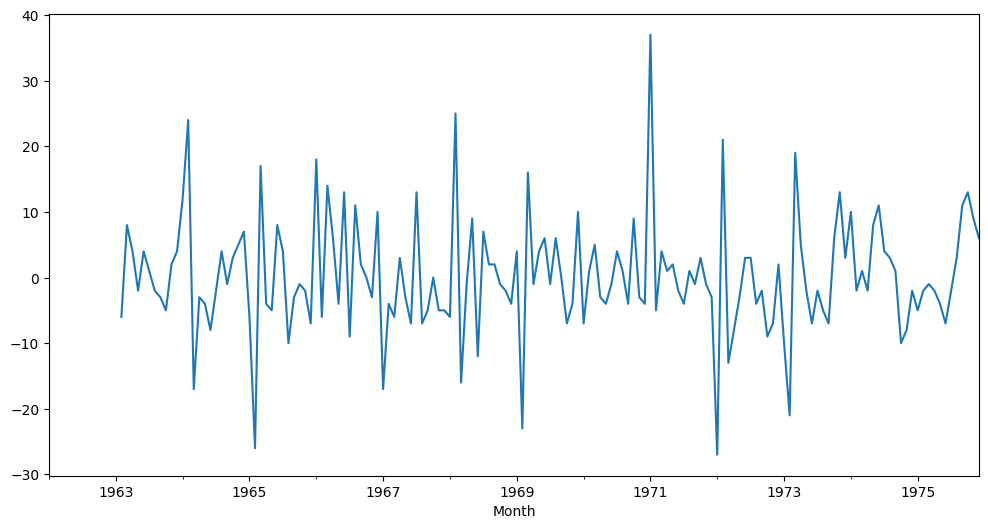

In [36]:
df['Seasonal First Difference'].plot(figsize=(12,6));

In [37]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistic : -5.038002274921981
p-value : 1.865423431878848e-05
# of lags : 11
Num of Observations used : 143
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


# Step 3

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

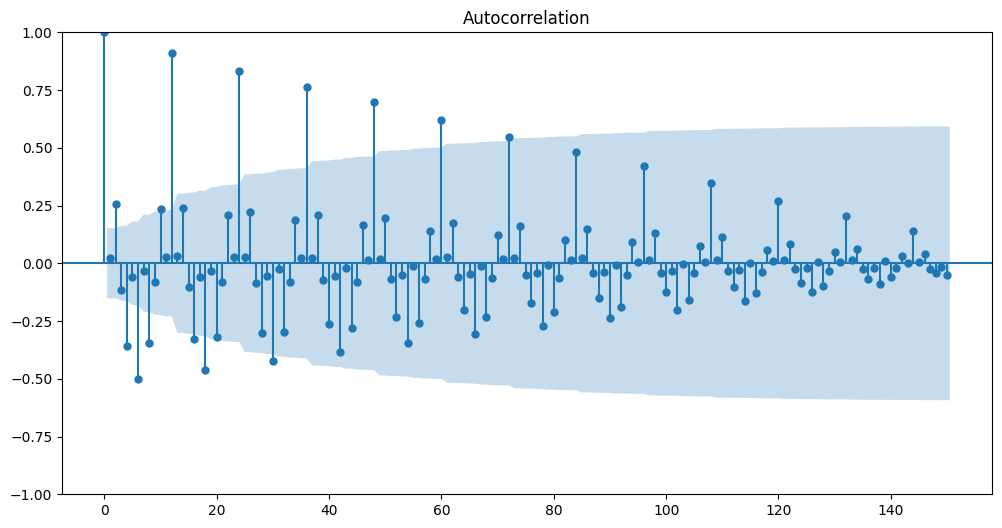

In [44]:
fig_first, ax = plt.subplots(figsize=(12, 6))
plot_acf(df['First Difference'].dropna(), ax=ax, lags=150);

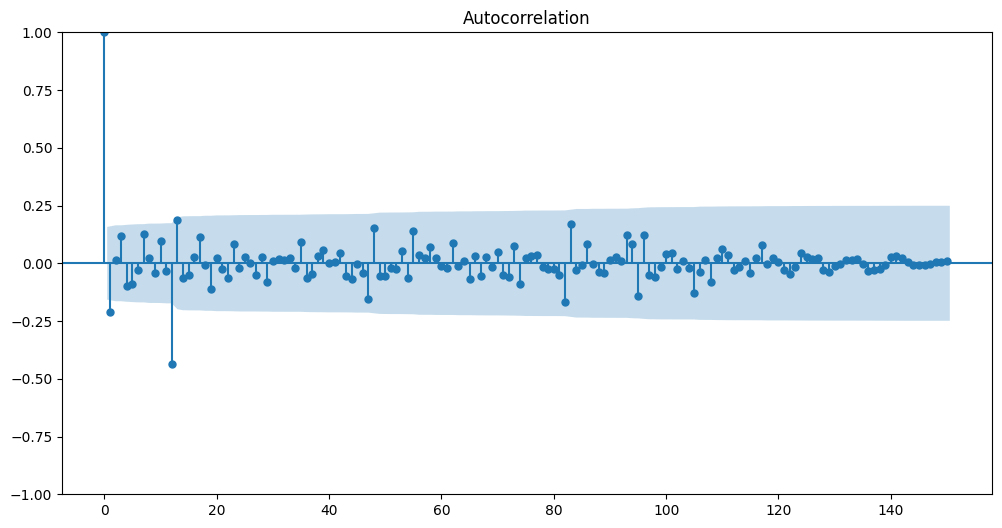

In [55]:
fig_seasonal_first, ax = plt.subplots(figsize=(12,6))
plot_acf(df['Seasonal First Difference'].dropna(), 
         ax=ax, lags=150, 
         #use_vlines=False
        );

In [53]:
# 판다스로도 거시적으로 간단히 그릴 수 있음
from pandas.plotting import autocorrelation_plot

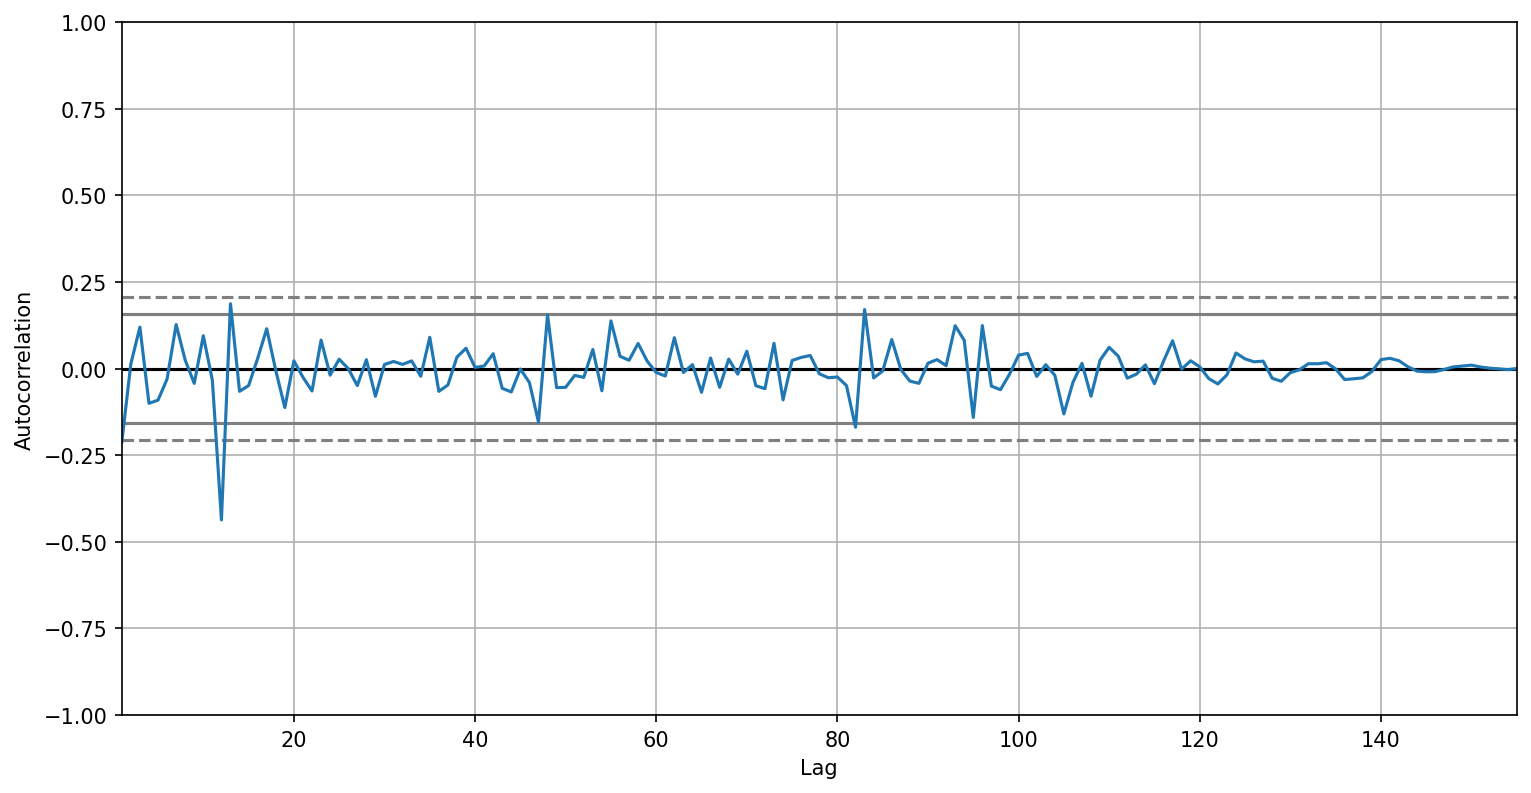

In [51]:
plt.figure(figsize=(12,6),dpi=150)
autocorrelation_plot(df['Seasonal First Difference'].dropna())
plt.show()

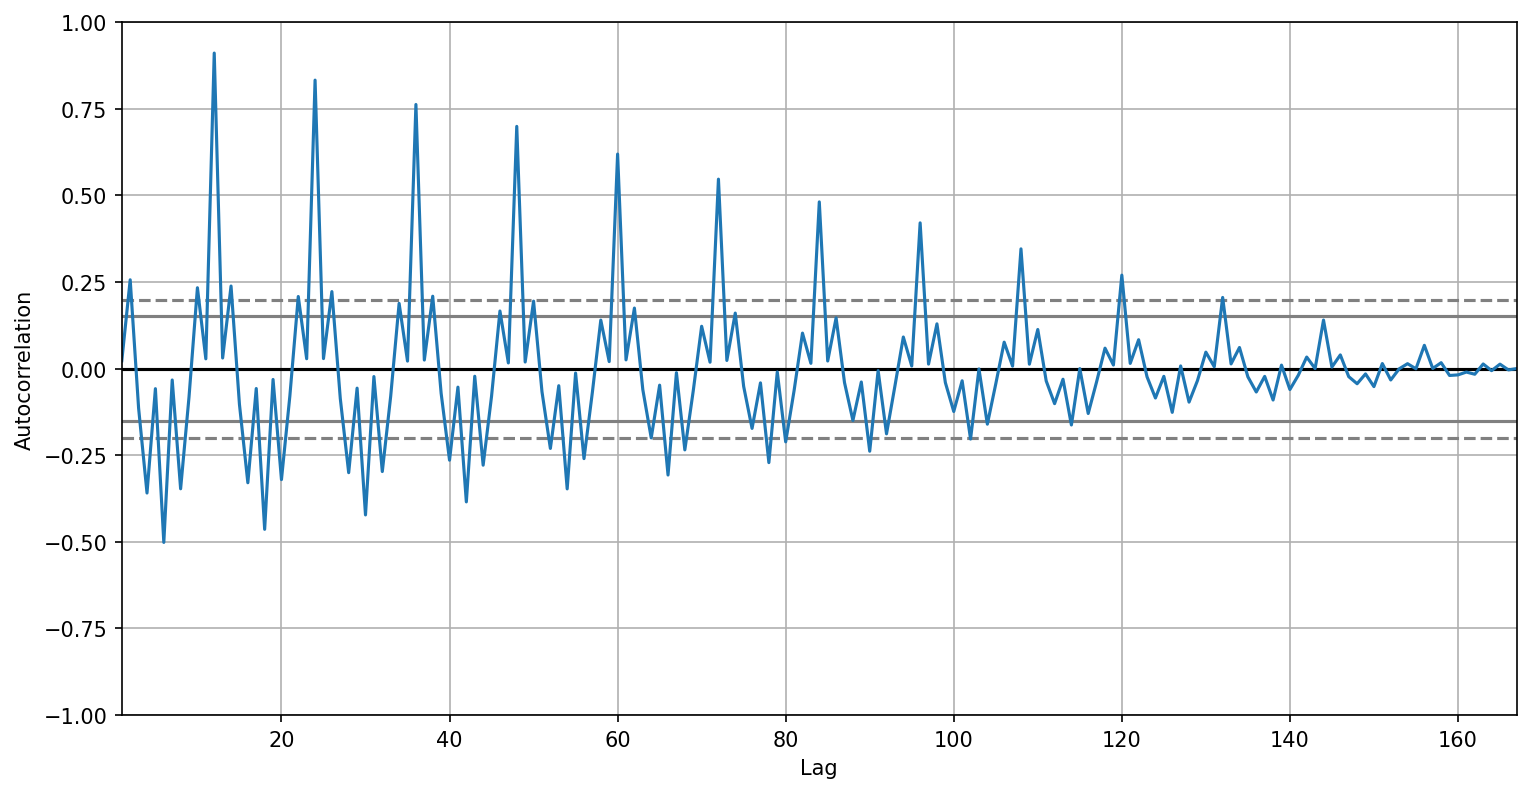

In [52]:
plt.figure(figsize=(12,6),dpi=150)
autocorrelation_plot(df['First Difference'].dropna())
plt.show()

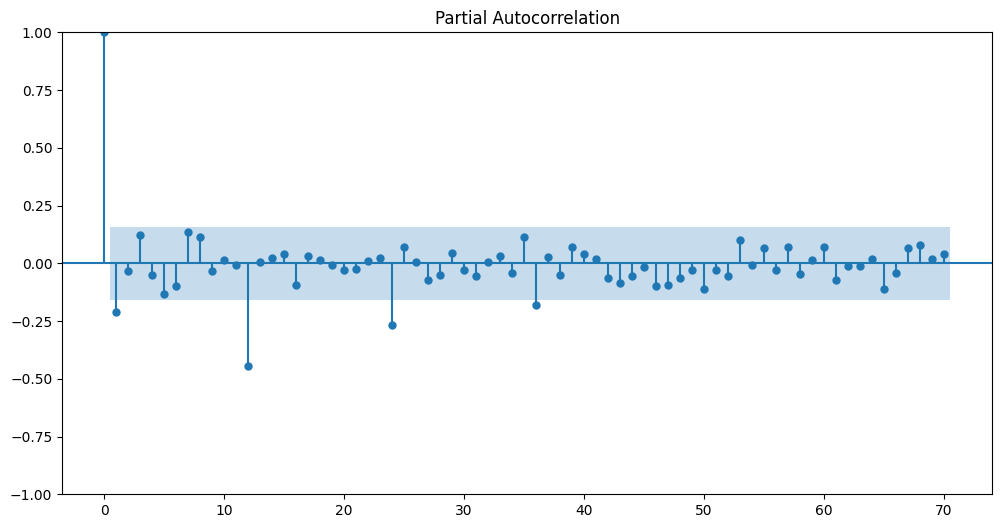

In [64]:
result, ax =  plt.subplots(figsize=(12,6))
plot_pacf(df['Seasonal First Difference'].dropna(),ax=ax,lags=70);

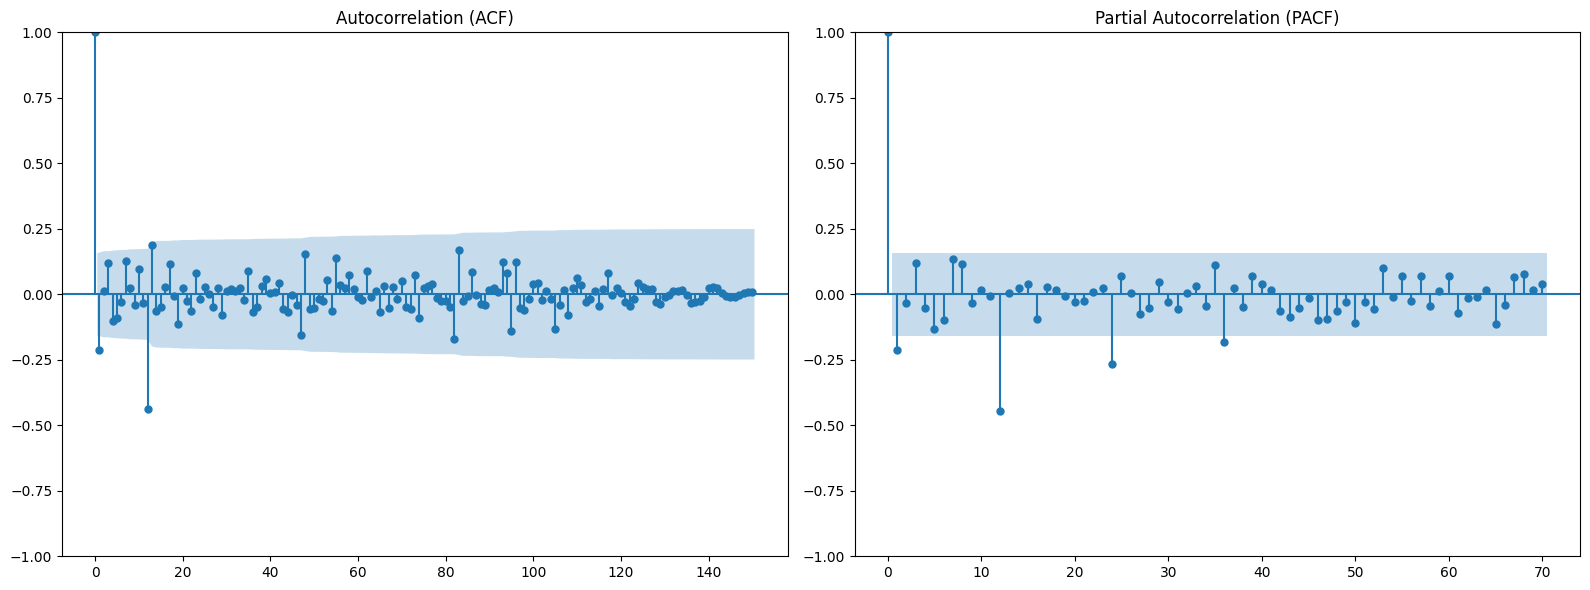

In [66]:
# 1. 도화지를 준비하되, 액자를 1행 2열(좌, 우)로 나눕니다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 2. 첫 번째 액자(ax1)에는 ACF를 그립니다.
plot_acf(df['Seasonal First Difference'].dropna(), ax=ax1, lags=150)
ax1.set_title("Autocorrelation (ACF)")

# 3. 두 번째 액자(ax2)에는 PACF를 그립니다. (오류 방지를 위해 lags를 낮췄사옵니다)
plot_pacf(df['Seasonal First Difference'].dropna(), ax=ax2, lags=70)
ax2.set_title("Partial Autocorrelation (PACF)")

plt.tight_layout() # 그래프 간격 조정
plt.show()

# Step 4

In [68]:
from statsmodels.tsa.arima_model import ARIMA

In [71]:
df.index.freq = 'MS'
model = sm.tsa.statespace.SARIMAX(
    df['Milk in Pounds per Cow'],order=(0,1,0),seasonal_order=(1,1,1,12)
)  
results = model.fit()

In [72]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Sat, 27 Dec 2025   AIC                           1074.131
Time:                                      21:25:29   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

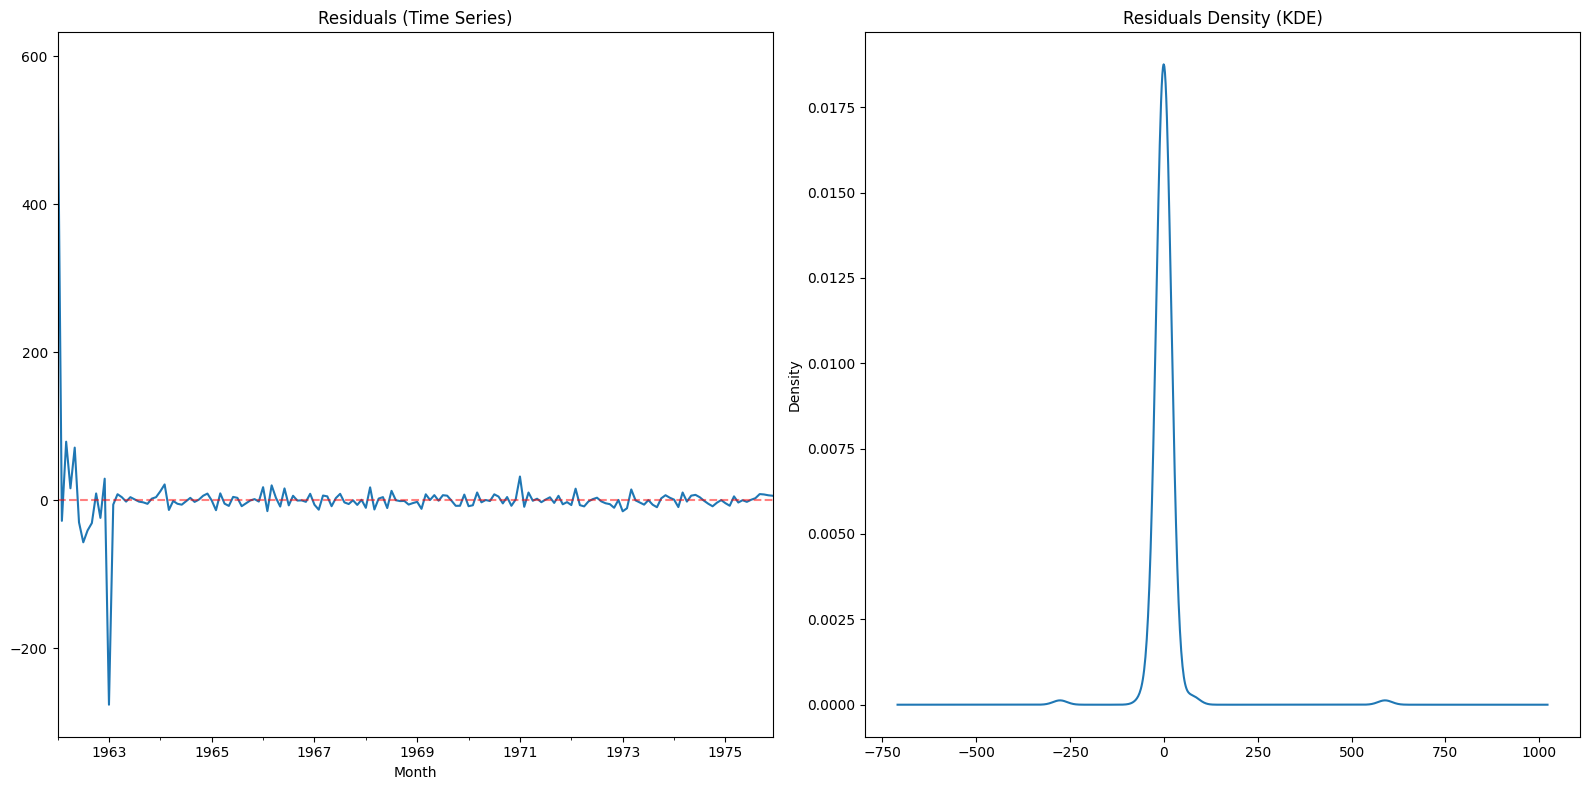

In [82]:
# 1. 1행 2열의 액자를 준비합니다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# 2. 왼쪽 액자(ax1): 잔차의 시계열 플롯 (시간 흐름에 따른 변동 확인)
results.resid.plot(ax=ax1, title="Residuals (Time Series)")
ax1.axhline(0, color='red', linestyle='--', alpha=0.5) # 0 기준선 추가

# 3. 오른쪽 액자(ax2): 잔차의 밀도 플롯 (정규분포 확인)
results.resid.plot(kind='kde', ax=ax2, title="Residuals Density (KDE)")

plt.tight_layout()
plt.show()

### 🔍 잔차 대시보드 판독 결과

1. 왼쪽: Residuals (Time Series) - "초반의 격동, 후반의 평온"
- 관찰: 1962년에서 1963년 사이 초반부에 그래프가 아주 크게 요동치고 있습니다. (위아래로 크게 솟구친 가시들!)
- 원인: 이는 **차분, Difference**을 수행하면서 데이터의 맨 앞부분 정보가 손실되거나, 모델이 초기에 데이터의 흐름을 파악하기 위해 적응하는 과정에서 발생하는 현상입니다.
- 판독: 1964년 이후로는 빨간 점선(0)을 중심으로 아주 일정하고 고르게 파르르 떨리고 있습니다. 이는 매우 고무적인 신호! 모델이 안정기에 접어든 이후로는 패턴을 아주 잘 잡아내고 있다는 뜻입니다.
<br>

2. 오른쪽: Residuals Density (KDE) - "날카로운 종 모양"
- 관찰: 0을 중심으로 아주 뾰족하고 예쁜 산 모양이 그려졌습니다.
- 판독: 산의 정상이 정확히 0에 위치한다는 것은 전하의 모델이 '평균적으로' 틀리지 않았다는 뜻입니다.
- 디테일: 다만 산 아래쪽(양옆)에 아주 작은 '혹'들이 미세하게 보이는데, 이것이 아까 성적표에서 Prob(JB) 점수를 살짝 깎아먹은 범인입니다. 하지만 이 정도면 전체적으로 **매우 깨끗하게 정제된 잔차**라고 볼 수 있습니다.

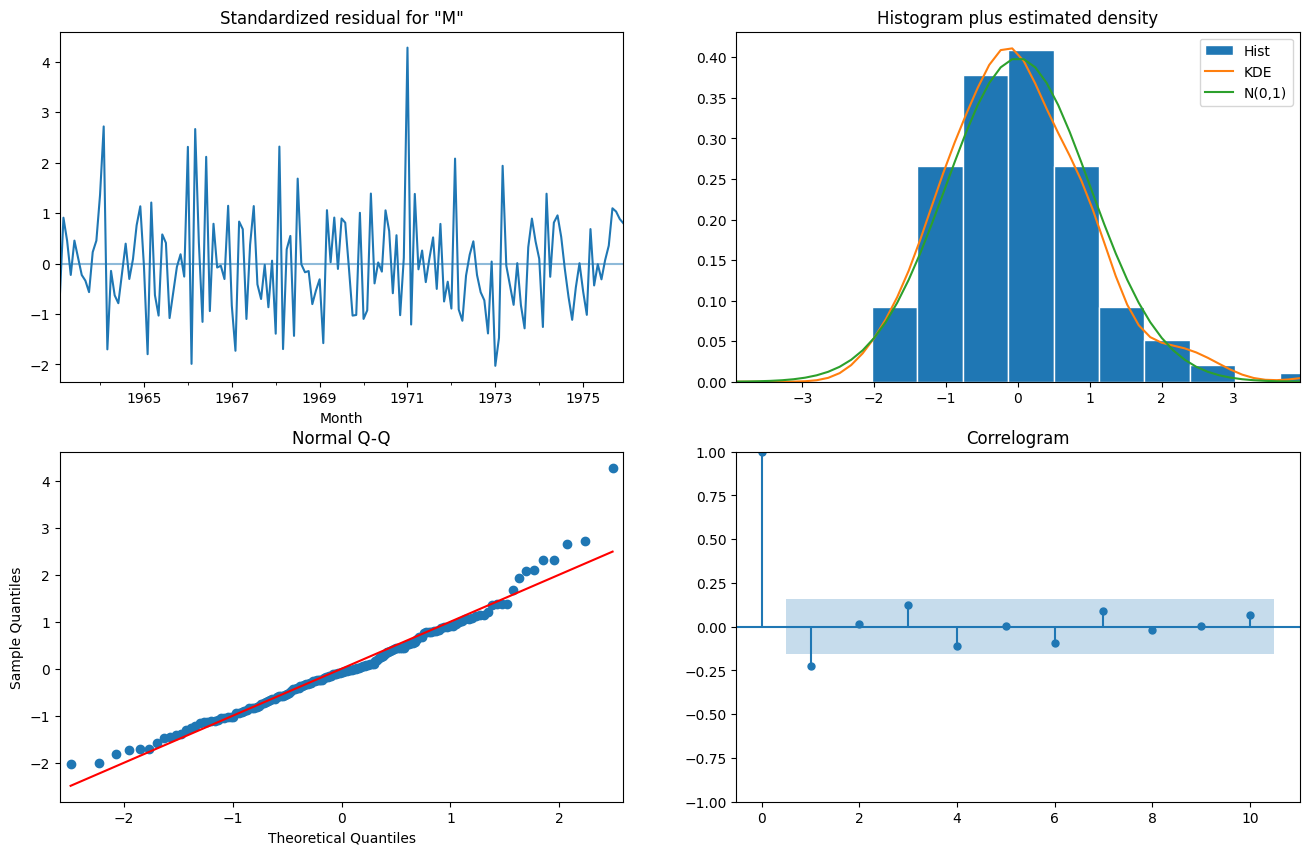

In [86]:
# 4개의 진단 차트가 동시에!
results.plot_diagnostics(figsize=(16, 10))
plt.show()

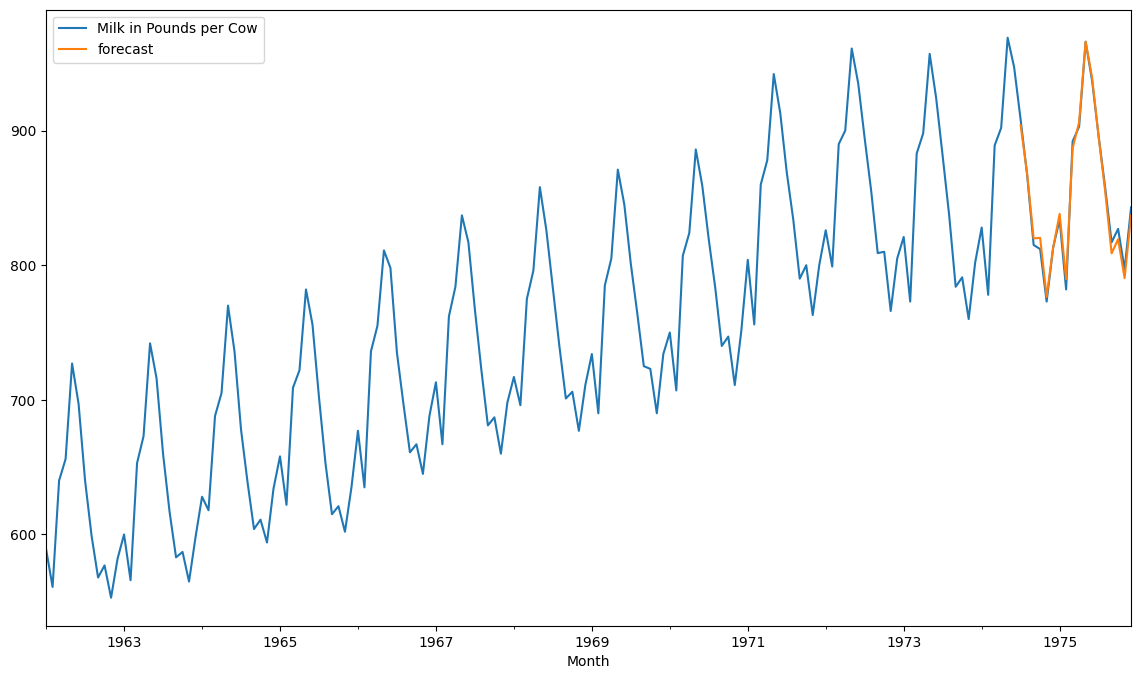

In [112]:
# 사후 검증 (In-sample Forecast)
df['forecast'] = results.predict(start=150, end=168)
df[['Milk in Pounds per Cow','forecast']].plot(figsize=(14,8));

In [88]:
df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358648
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841372
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323185
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427530
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063622


In [89]:
from pandas.tseries.offsets import DateOffset

In [96]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,25)]
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00'),
 Timestamp('1977-12-01 00:00:00')]

In [99]:
future_df = pd.DataFrame(index=future_dates,columns=df.columns,dtype='float64')
future_df.head()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
final_df = pd.concat([df,future_df])
final_df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-12-01,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
final_df['forecast'] = results.predict(start=168,end=192,dynamic=True)
final_df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918957
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881181
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027295
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962996
1977-12-01,NaN,NaN,NaN,NaN,NaN,879.383339


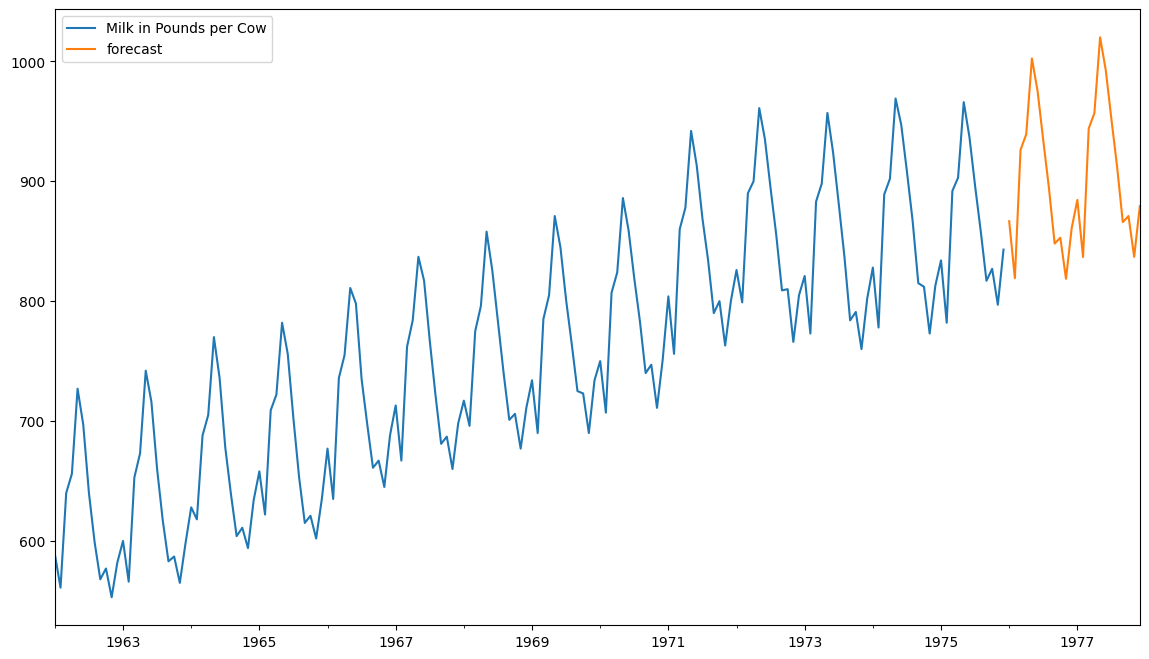

In [114]:
final_df[['Milk in Pounds per Cow','forecast']].plot(figsize=(14,8));

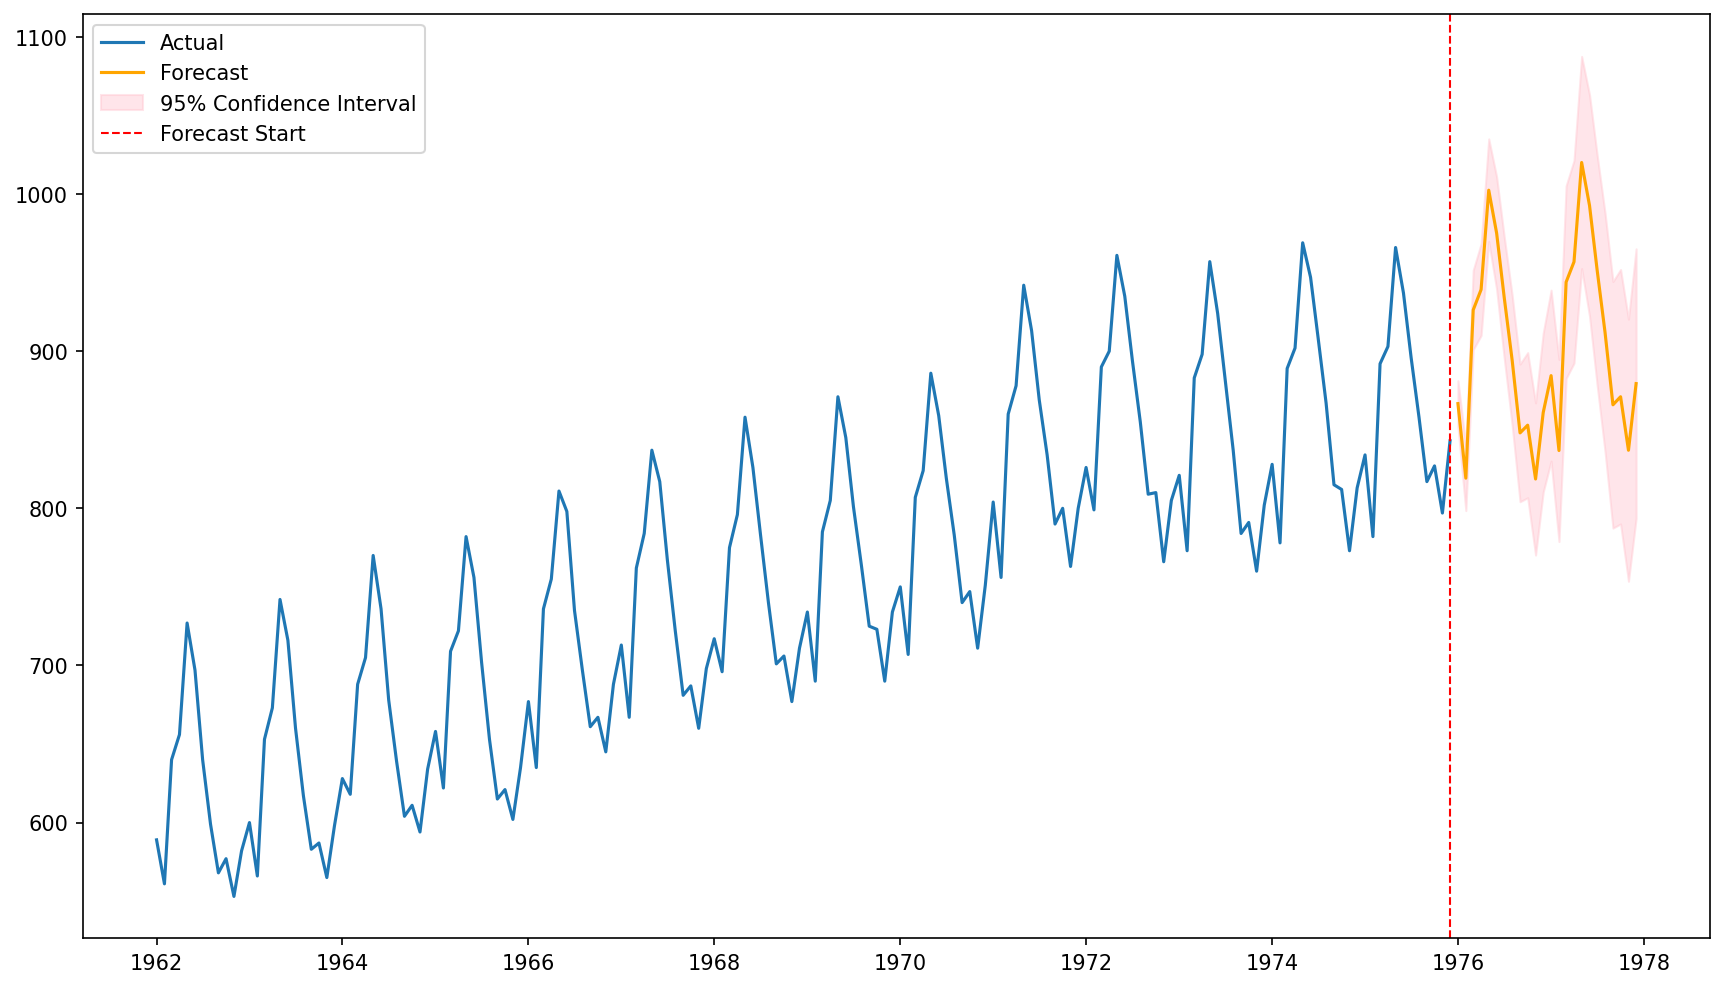

In [124]:
# 1. 미래 24개월 예측 및 신뢰구간 추출
forecast_object = results.get_forecast(steps=24) # 24단계 미래 예측
forecast_mean = forecast_object.predicted_mean  # 주황색 선 (예측값)
confidence_intervals = forecast_object.conf_int() # 신뢰구간 (하한, 상한)

# 2. 그래프 그리기
plt.figure(figsize=(14, 8),dpi=150)

# 실제 데이터 (파란색)
plt.plot(df.index, df['Milk in Pounds per Cow'], label='Actual')

# 미래 예측 데이터 (주황색)
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='orange')

# 미래 부분에만 신뢰구간 음영 넣기 (fill_between)
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0], # 하한값
                 confidence_intervals.iloc[:, 1], # 상한값
                 color='pink', alpha=0.4, label='95% Confidence Interval')

# ★ 빨간 점선 추가 (라벨: Forecast Start)
plt.axvline(x=df.index[-1], color='red', linestyle='--', linewidth=1, label='Forecast Start')

plt.legend()
plt.show()

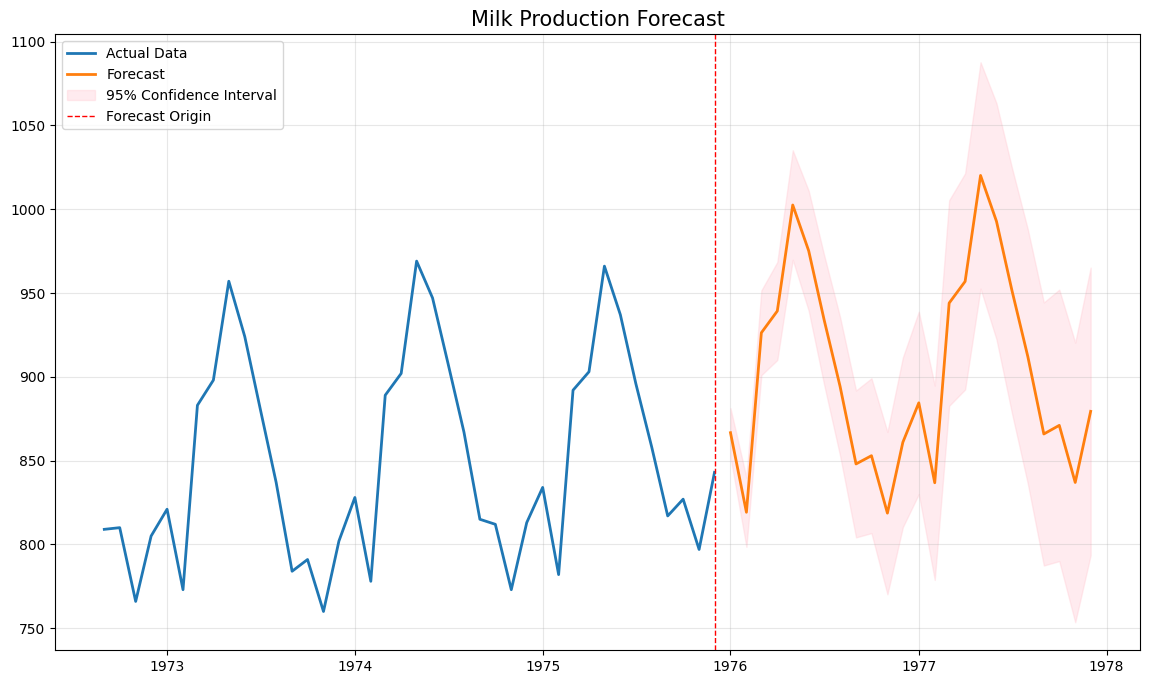

In [127]:
# 1. 미래 24개월을 예측합니다.
forecast_steps = 24
forecast_res = results.get_forecast(steps=forecast_steps)

# 2. 예측값(선)과 신뢰구간(음영용 데이터)을 따로 추출합니다.
forecast_mean = forecast_res.predicted_mean
conf_int = forecast_res.conf_int() # 여기서 '하한값', '상한값'이 나옵니다.

# 3. 그래프를 하사합니다.
plt.figure(figsize=(14, 8))

# [파란색] 실제 데이터의 마지막 부분만 보여주어 미래와 연결합니다.
plt.plot(df.index[-40:], df['Milk in Pounds per Cow'].iloc[-40:], label='Actual Data', color='#1f77b4', lw=2)

# [주황색] 예언선 (미래 예측치)
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='#ff7f0e', lw=2)

# [음영] 신뢰구간 '부채꼴' 음영입니다! 
# fill_between을 사용하여 상한(upper)과 하한(lower) 사이를 채웁니다.
plt.fill_between(forecast_mean.index,
                 conf_int.iloc[:, 0], # 하한 (Lower bound)
                 conf_int.iloc[:, 1], # 상한 (Upper bound)
                 color='pink', alpha=0.3, label='95% Confidence Interval')

# ★ 빨간 점선 추가 (라벨: Forecast Origin)
plt.axvline(x=df.index[-1], color='red', linestyle='--', linewidth=1, label='Forecast Origin')

plt.title("Milk Production Forecast", fontsize=15)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

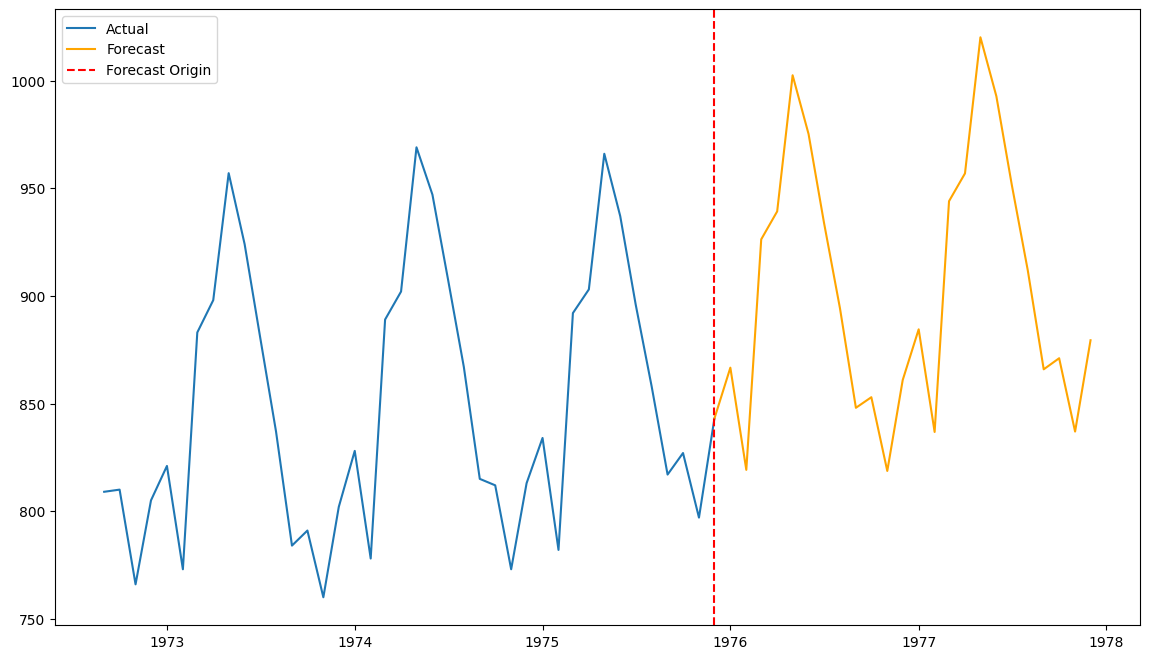

In [128]:
# 1. 실제 데이터의 마지막 값과 날짜를 가져옵니다.
last_actual_date = df.index[-1:]
last_actual_value = df['Milk in Pounds per Cow'].iloc[-1:]

# 2. 예측 데이터 앞에 실제 데이터의 마지막 지점을 합칩니다.
# 이렇게 하면 주황색 선이 1975년 12월부터 출발합니다.
full_forecast_mean = pd.concat([last_actual_value, forecast_mean])

# 3. 그래프를 다시 그리시면 틈새가 사라집니다!
plt.figure(figsize=(14, 8))
plt.plot(df.index[-40:], df['Milk in Pounds per Cow'].iloc[-40:], label='Actual')
plt.plot(full_forecast_mean.index, full_forecast_mean, color='orange', label='Forecast')

# 빨간 점선 위치는 여전히 1975년 12월 1일!
plt.axvline(x=df.index[-1], color='red', linestyle='--', label='Forecast Origin')
plt.legend()
plt.show()